In [38]:
import numpy as np

# The Numpy array vs. the built-in Python list

![texte](https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png)

- With Numpy, you are able to specify the exact format (a.k.a. dtype) of the data.
- This formatted data is stored in one concise place in your memory, *in order*
- Therefore, Numpy has some clear advantages:
    - Your computer doesn't have to search around for the location of every single element
    - Mathematical operations are guaranteed to work in the same way for every element (for example, note that the same mathematical operation might be algorithmically very different for `float` vs `int` dtypes)

# Array creation methods review (with dtypes in mind)

## `np.arange` (arguments: [start=0,] stop, [step=1])

In [39]:
# np.arange creates int arrays by default if the arguments are ints (5 is an int)
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [40]:
# We can easily convert ints to floats and vice versa with the .astype() method
a.astype(float)

array([0., 1., 2., 3., 4.])

In [41]:
# We also could have just specified dtype=float during construction
np.arange(4, 10, 2, dtype=float)

array([4., 6., 8.])

## `np.zeros`, `np.ones` (only positional argument is shape, a.k.a. array size)

In [42]:
# These create floats by default
np.ones(3), np.zeros(4)

(array([1., 1., 1.]), array([0., 0., 0., 0.]))

In [43]:
np.ones(3, dtype=int), np.zeros(3, dtype=int)

(array([1, 1, 1]), array([0, 0, 0]))

In [44]:
# They are also commonly used for the boolean dtype, where 1=True and 0=False
np.ones(3, dtype=bool), np.zeros(3, dtype=bool)

(array([ True,  True,  True]), array([False, False, False]))

## `np.linspace`, `np.logspace` (arguments: start, stop, [num=50])

In [45]:
# np.linspace() generates `num` numbers between (and including) `start` and `stop`
# intermediate numbers are spaced evenly in linear-space - dtype is float by default
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [46]:
# np.logspace() generates `num` numbers between (and including) 10^(`start`) and 10^(`stop`)
# intermediate numbers are spaced evenly in log-space - equivalent to 10 ** np.linspace(...)
np.logspace(0, 1, 10)

array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ])

In [47]:
# While you could construct these with ints or bools, it probably wouldn't make much sense.
# But, you can change the precision of the float by
# specifying dtype = np.float128, np.float64 (default float), np.float32, and np.float16
np.logspace(0, 1, 10, dtype=np.float16)

array([ 1.   ,  1.292,  1.668,  2.154,  2.783,  3.594,  4.64 ,  5.996,
        7.742, 10.   ], dtype=float16)

## `np.array` (argument: any iterable, e.g. a list)

In [48]:
# If all elements of the list are ints, the array dtype will be int
np.array([1, 2, 3])

array([1, 2, 3])

In [49]:
# If there are any floats, everything will be converted to floats
np.array([1.0, 2, 3])

array([1., 2., 3.])

In [50]:
# If there are any other Python objects, numerical operations might not work
a = np.array([1, "2.0", set()])
b = np.array(["1", "2.0", None])
print(a.dtype)
print(a == b)  # some operations may work, but there is no performance benefit for object arrays

object
[False  True False]


## `np.random.default_rng()` to generate random numbers

First create a random number generator: `rng = np.random.default_rng()`.
- `rng.uniform(low=0, high=1, size=None)`: Uniform distribution over [low, high)
- `rng.normal(loc=0, scale=1, size=None)`: Normal distribution
- `rng.poisson(lam, size=None)`: Poisson distribution
- Many more distributions to choose from
- (and in principle, you can transform `rng.uniform` to any mathematical distribution you like)

In [51]:
# Try changing the bounds and size parameter to generate an array with several elements
rng = np.random.default_rng()
rng.uniform()

0.2700330254085346

In [52]:
# Try changing the loc and scale parameters to change the center/width of the normal distribution
rng.normal()

0.19432009185615393

In [53]:
# Try changing the Poisson parameter ("lam") and size of output array
rng.poisson(lam=10, size=10)

array([10, 13,  6, 13, 15, 10,  9, 17,  9, 15])

# Array Methods
Like all other data structures in Python, NumPy arrays are objects. These objects have methods associated with them.   
Recall that methods are just like functions but are associated with an object. Whereas functions take an object as an input and return another object as the output, methods act on the object they are associated with and may alter the object itself. Here's an example, the `array.sum()` **method** returns the sum of all the elements of the array. The `np.sum()` **function** takes an array as its input and returns the sum of its elements as outputs. Both do the same thing but are accessed in different ways. A complete lists of methods and attributes associated with any NumPy array can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

In [54]:
pos_1 = np.array([1, 2, 3])
pos_1.sum()

6

In [55]:
np.sum(pos_1)

6

# Element-wise comparisons

Operators like `<`, `>`, `<=`, `>=`, `==`, and `!=` work element-wise over Numpy arrays

In [56]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print(a < b)
print(a == b)

[ True  True False False False]
[False False  True False False]


We can save the output "boolean" arrays of True and False values. These arrays can be useful for "masking" or calculating the fraction of values which are True, for example.

In [57]:
a_less_than_b = a < b
print(a_less_than_b)

[ True  True False False False]


In [58]:
# We can mask a and b to only show their values where a is less than b
print(a[a_less_than_b])
print(b[a_less_than_b])

[1 2]
[5 4]


In [59]:
# Since True = 1 and False = 0, we can use sum to find how many values in `a` are less than their `b` counterpart
print("There are", np.sum(a_less_than_b), "values of a less than b")

There are 2 values of a less than b


In [60]:
# We can find the opposite of a boolean array
print(a_less_than_b)
print(np.logical_not(a_less_than_b))

[ True  True False False False]
[False False  True  True  True]


## Calculate the *percentage* of values in `a` that are less than their `b` counterpart

In [61]:
## INSERT CODE HERE ##
print("This is", np.mean(a_less_than_b) * 100, "percent of the values")

This is 40.0 percent of the values


# Exercise: Generating random numbers and masking

1. Generate an array of length 100,000 where each element is drawn from a Gaussian distribution with
    - population mean $\mu = 4$ and
    - population scatter $\sigma = 2$
2. What is the fraction of elements whose value is less than zero?
3. Use the matplotlib skills you learned yesterday and plot a histogram of your generated values
    - make all positive values a different color from negative values

In [62]:
## INSERT CODE HERE ##
rng = np.random.default_rng()
sample = rng.normal(loc=4, scale=2, size=100_000)
np.mean(sample < 0)

0.02283

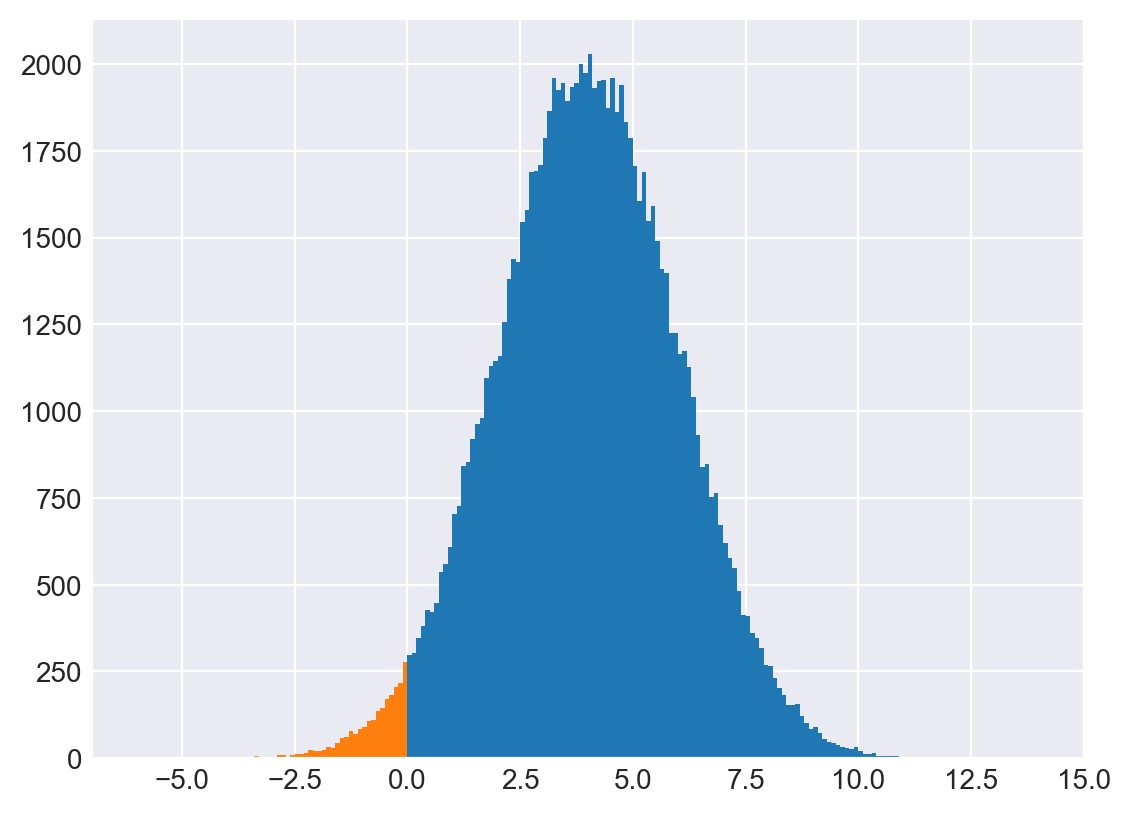

In [63]:
import matplotlib.pyplot as plt
## INSERT PLOTTING CODE HERE ##
fig, ax = plt.subplots()

ax.hist(sample[sample > 0], bins=np.linspace(-6, 14, 201))
ax.hist(sample[sample < 0], bins=np.linspace(-6, 14, 201));  # use a colon to suppress the ax.hist() output

# More mathematical functions

In addition to the elementary operations (`+`, `-`, `*`, `/`), Numpy has a host of built-in mathematical functions which also operate element wise. These functions are generally faster than using loops to calculate the value of the function on each element. Let's see this in action by calculating the $\sin$ of an array using traditional python and also NumPy. We will measure the runtime using the `%%timeit` magic command.

In [64]:
from math import sin

In [65]:
%%timeit

vals = [i for i in range(10000)] # Create a list of 10,000 integers starting with 0
sin_vals = [sin(i) for i in vals] # Use a for loop to calculate the sin of each integers

1.07 ms ± 7.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**NOTE:** The above way of using `for` loop to generate a list is called list comprehension. So this line of code
```python
numbers = [2 * i for i in range(100)]
```
is equivalent to doing
```python
numbers = []
for i in range(100):
    numbers.append(2 * i)
```
Both achieve the same thing, the former is the more "pythonic" way.

In [66]:
%%timeit

vals = np.arange(10000)
sin_vals = np.sin(vals)

78.7 µs ± 503 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


As seen above we can use the NumPy `sin` function which takes an array as its input. Almost all common mathematical functions are implemented as native numpy functions. A complete list can be found [here](https://numpy.org/doc/stable/reference/routines.math.html?highlight=mathematical%20functions).
   
We can see a huge improvement in runtime when using NumPy over barbones Python. This is because NumPy functions (aka `ufuncs`) are implemented in other compiled languages like C or Fortran and made available to be used in Python. Whenever possible it is recommended to use NumPy's inbuilt data structures and functions. These implementations are also called **vectorized** functions. Vectorization is a theme we will visit many times in this tutorial.    


**NOTE:** Though they might look very similar Python `lists` are completely different objects than Numpy arrays. `list` is a native Python data type while NumPy arrays are not. Attributes and methods of lists like `.append()` do not work on NumPy arrays and vice versa. Moreover the elements of a list can each be of a different data type, for example
```python
example_list = [2.0, 1, "A sentence"]
```
is a list which has a `float`, an `int` and a `str` as its element. This is not possible in a NumPy array. All the elements need to be of the same datatype.
  
## Plotting $\sin(x)$

Let's try this out by plotting $\sin(x)$ between $0$ and $2\pi$. The first step is to define a NumPy array for x. (*Hint: Google how to define $\pi$ using NumPy.*)

In [67]:
## INSERT CODE HERE ##
x = np.linspace(0, 2 * np.pi)

Next, we define the array for $\sin(x)$.

In [68]:
## INSERT CODE HERE ##y = np.sin(x)
y = np.sin(x)

Finally, use the matplotlib skills you learned yesterday to plot! 

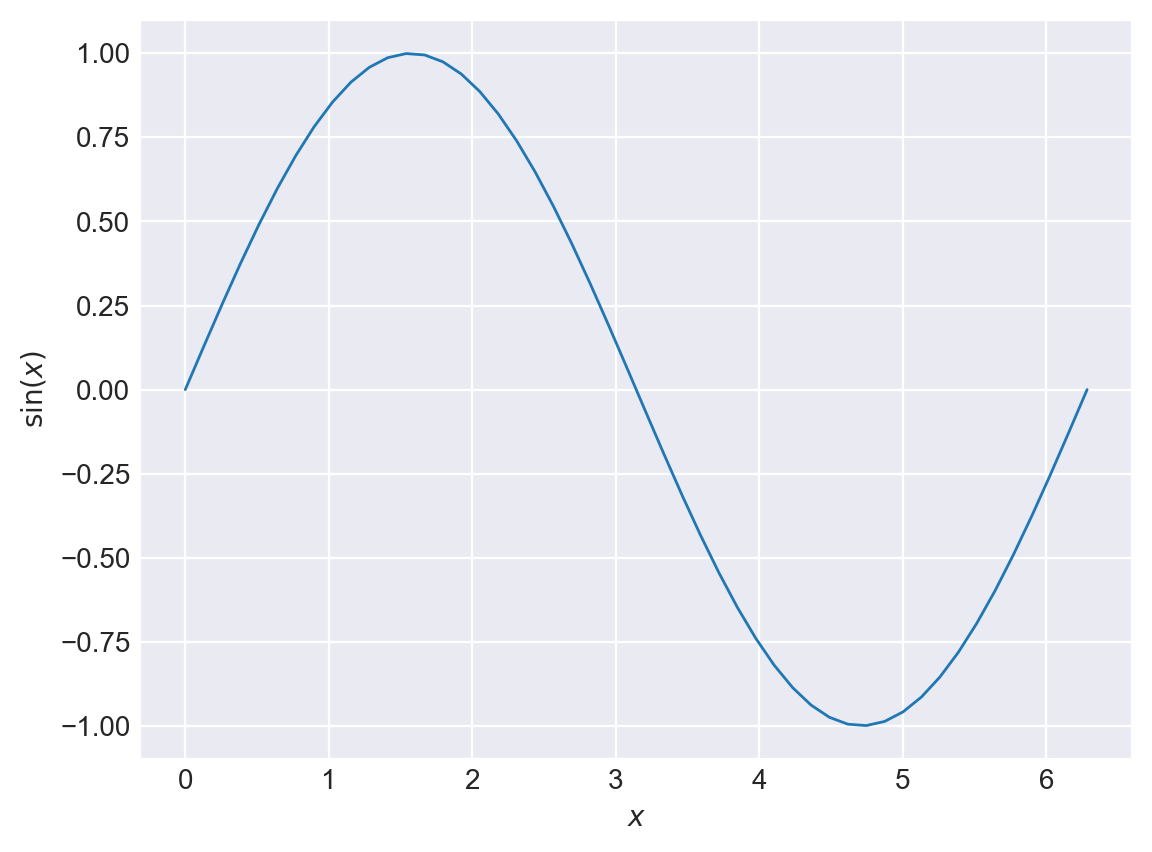

In [69]:
import matplotlib.pyplot as plt
## INSERT CODE HERE ##
fig, ax = plt.subplots()
ax.set_ylabel(r'$\sin(x)$')
ax.set_xlabel(r'$x$')
ax.plot(x, y)

# Plotting the galaxy luminosity function

The number density of galaxies having a given luminosity $(\Phi(L))$ is found to follow the functional form
$$ \Phi(L)=\left( \dfrac{\Phi^*}{L^*} \right) \left( \dfrac{L}{L^*} \right)^{\alpha}10^{\left(-\dfrac{L}{L^*}\right)}$$

Assuming the normalization constant $\left( \dfrac{\Phi^*}{L^*} \right)$ to be unity and $\alpha = -1.5, -1.0 \text{ and} -0.5$,  plot $\log(\Phi(L))$ versus $\dfrac{L}{L^*}$. Follow these steps:

Take a look at the documentation for `np.logspace`. Generate the $x$ axis (i.e.$\dfrac{L}{L^*}$ ) as a logarithmically spaced grid of 50 data points between $10^{-2}$ and $10$.

In [70]:
## INSERT CODE HERE ##
lum = np.logspace(-2, 1, 50)

Use NumPy functions and binary operations on the above array to generate the y axis (i.e. $\log(\Phi(L))$). The function to take the logarithm with a base 10 in numpy is `np.log10` whereas the function to take the natural logarithm is `np.log`.   

Since we are doing the same operation thrice for different input parameters, it is really helpful to define a function. 

In [71]:
def get_log_phi(lum, alpha):
    """
    Function to calculate the log of luminosity function
    
    Arguments:
    l (array): Values of L/L^star
    alpha (float): Faint end slope parameter
    
    Returns:
    array: The log of the luminosity function
    """
    
    # COMPLETE THESE THREE LINES OF CODE
    phi = lum ** alpha * 10 ** -lum
    log_phi = np.log10(phi)
    
    return log_phi

**NOTE:** The chunk of commented text following the function definition is called a docstring. It is a good practice to always add a doctring whenever you define a function and intend to reuse it.

The following is an example of a very basic docstring. 

```python
def a_generic_function(input1, input2):
    """
    This is what the funtion does
    
    Arguments:
    input1 (data_type): Meaning of the input
    
    
    Returns
    data_type: Meaning of the return value
    
    """
    
    return something
```

There are multiple formatting schemes for doctsrings. The one followed by the Scientific Python community can be found [here](https://docs.scipy.org/doc/numpy/docs/howto_document.html).  

This docstring can be accessed using the usual methods of accessing the documentation for any function imported from a library. Access the docstring for the function we defined in the previous cell:

In [72]:
# COMPLETE THIS LINE OF CODE
get_log_phi?
# OR
help(get_log_phi)

Help on function get_log_phi in module __main__:

get_log_phi(lum, alpha)
    Function to calculate the log of luminosity function
    
    Arguments:
    l (array): Values of L/L^star
    alpha (float): Faint end slope parameter
    
    Returns:
    array: The log of the luminosity function



Signature: get_log_phi(lum, alpha)
Docstring:
Function to calculate the log of luminosity function

Arguments:
l (array): Values of L/L^star
alpha (float): Faint end slope parameter

Returns:
array: The log of the luminosity function
File:      /var/folders/m2/k7_106bj27q3p58ylgd6s_gm0000gn/T/ipykernel_31122/1129426983.py
Type:      function

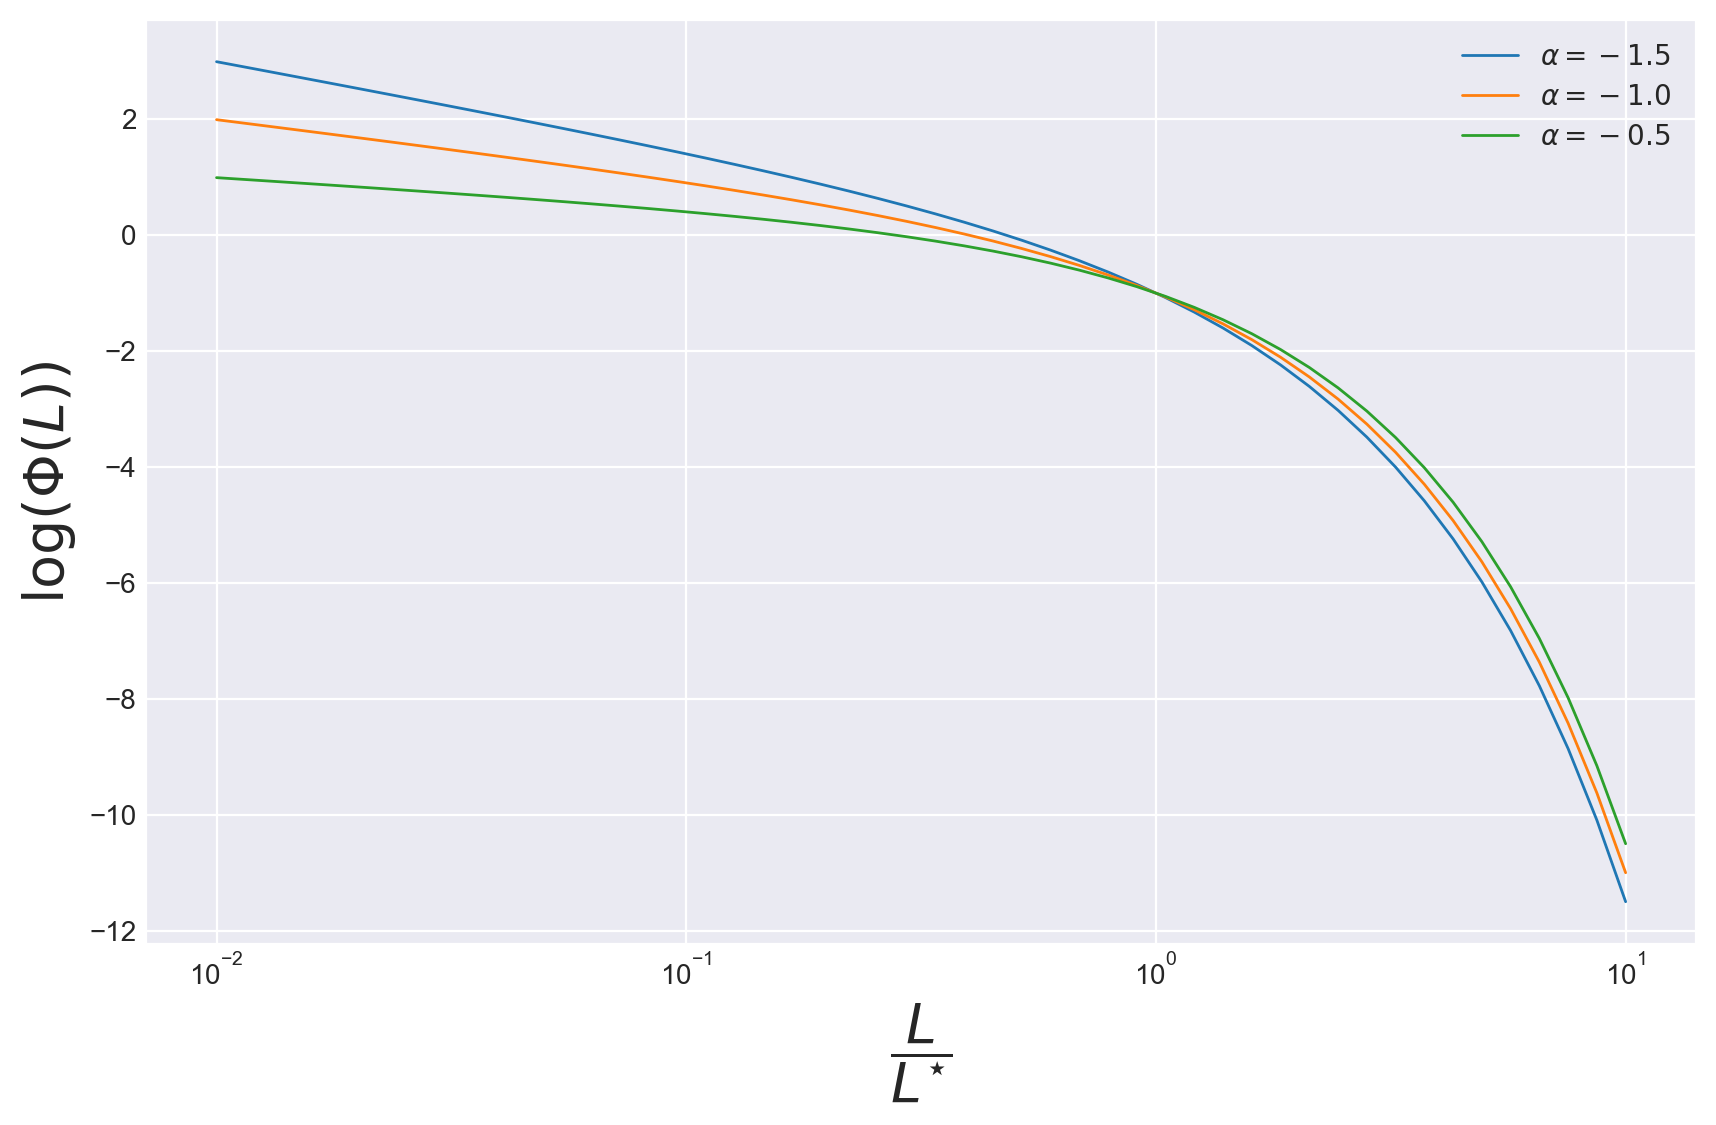

In [73]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))


# COMPLETE THESE THREE LINES OF CODE

ax.plot(lum, get_log_phi(lum, -1.5), label=r"$\alpha=-1.5$")  # for alpha = -1.5
ax.plot(lum, get_log_phi(lum, -1.0), label=r"$\alpha=-1.0$")  # for alpha = -1.0
ax.plot(lum, get_log_phi(lum, -0.5), label=r"$\alpha=-0.5$")  # for alpha = -0.5

ax.set_xlabel(r"$\dfrac{L}{L^{\star}}$", fontsize=20)  # Print the x label in latex
ax.set_ylabel(r"$\log(\Phi(L))$", fontsize=20)  # Print the x label in latex
ax.set_xscale("log")  # Set the spacing in the x axis logarithmically
ax.legend()